# Exercise 5 Dynamical Systems

> Made by: [David Rosado Rodríguez](https://davidrosado4.github.io/Webpage/)

 Given $\alpha$, $\epsilon\in$ [0, 1) and $\theta\in$ [0, 1), consider the circle map
\begin{align*}
f_{\alpha,\epsilon}(\theta) = \theta + \alpha + \frac{\epsilon}{2\pi}sin(2\pi\theta)\hspace{0.55cm}\text{(mod 1)}.
\end{align*}
We've been tasked with creating a computer program that generates the graph of the map $\alpha\mapsto\rho(f_{\alpha,\epsilon})$ for different values of $\epsilon$.


In [ ]:
 # Requiered imports
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

To begin, let us create a graph of the function $f_{\alpha, \epsilon}$ for various combinations of the parameters $(\alpha, \epsilon)$.

In [ ]:
# Define the function f
def f(x, eps, alpha):
    result = (x + alpha + (eps / (2 * np.pi)) * np.sin(2 * np.pi * x)) % 1
    return np.where(result > 0.995, np.nan, result) # To avoid vertical lines going from 1 to 0 in the plot

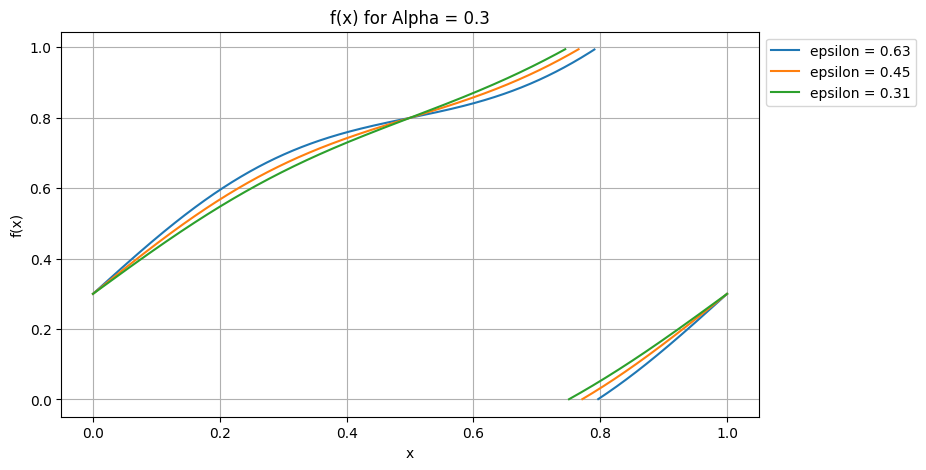

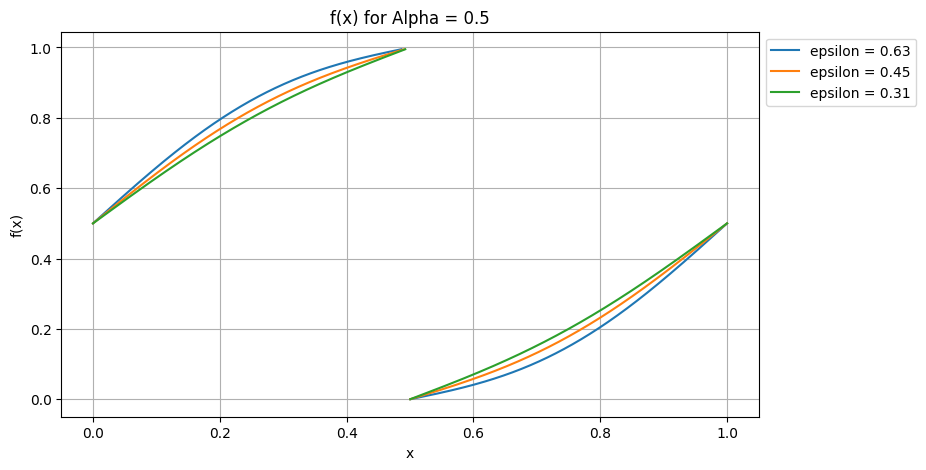

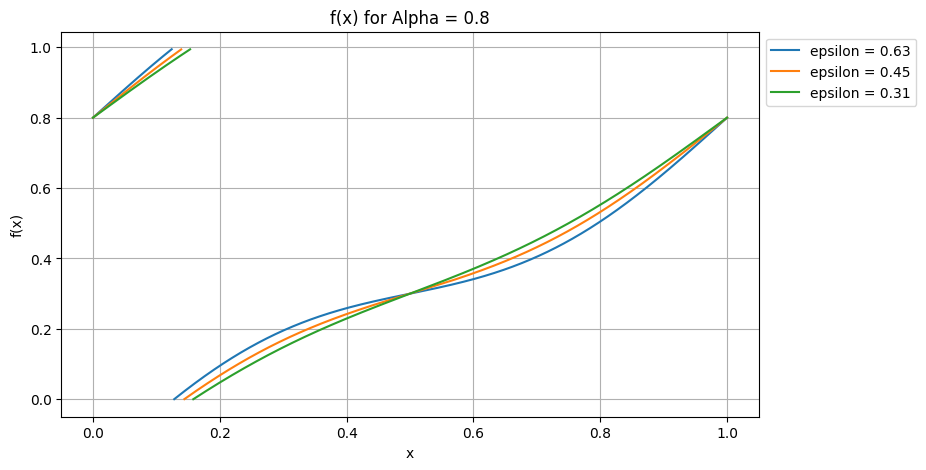

In [ ]:
# Define the range of x values
x = np.linspace(0, 1, 1000)
# Select different values of alpha and epsilon
alpha_values = [0.3, 0.5, 0.8]
epsilon_values = [np.pi/5, np.pi/7, np.pi/10]

# Create a plot for each value of alpha
for alpha in alpha_values:
    plt.figure(figsize=(9, 5))
    plt.title(f'f(x) for Alpha = {alpha}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)

    for epsilon in epsilon_values:
        y = [f(xi, epsilon, alpha) for xi in x]
        plt.plot(x, y, label=f'epsilon = {epsilon:.2f}')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


Now, let us compute and plot the map $\alpha\mapsto\rho(f_{\alpha,\epsilon})$ for different values of $\epsilon$. First, let us define a lift of the function $f_{\alpha,\epsilon}$.

In [ ]:
# Define one of its lift
def F(x,alpha,eps):
  return x + alpha + (eps / (2 * np.pi)) * np.sin(2 * np.pi * x)

The Python function below, when provided with the parameters $(\alpha, \epsilon)$, performs a series of iterations to calculate the rotation number.

In [ ]:
# Compute the rotation number
def rotation_number(F, n, alpha, eps, x_0):
    x = x_0
    for k in range(n):
        x = F(x, alpha, eps)
    return (x / n - np.floor(x / n))


Finally, we are ready to compute the rotation number as a function of $\alpha$.

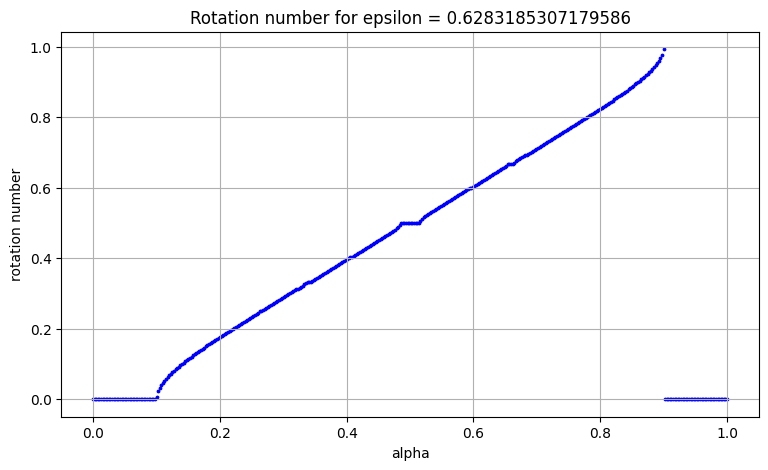

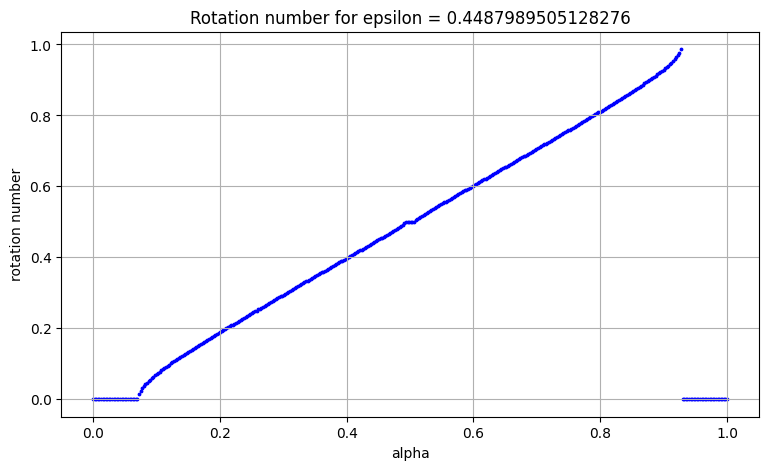

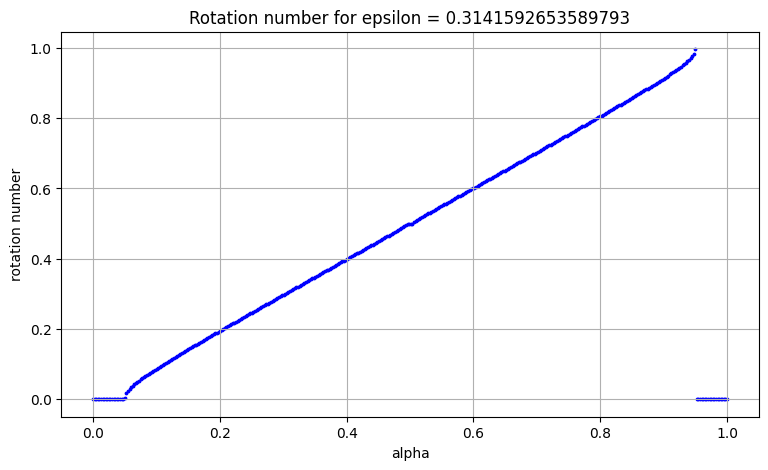

In [ ]:
# Fix three epsilon values
epsilon_values = [np.pi/5, np.pi/7, np.pi/10]
# Take 400 values of alpha in [0,1)
alpha_values = np.linspace(0, 1, 400)
# Fix iterates in rotation number
n=10000
for eps in epsilon_values:
  plt.figure(figsize=(9, 5))
  plt.title(f'Rotation number for epsilon = {eps}')
  plt.xlabel('alpha')
  plt.ylabel('rotation number')
  plt.grid(True)
  for alpha in alpha_values:
    x_0 = 0.5 # Can be any number, the rotation number is independent of this choice
    rot_number = rotation_number(F,n,alpha,eps,x_0)
    plt.scatter(alpha,rot_number,color='blue', marker='o',s=3)

plt.show()


Now, we would like to draw the tongues $T_\lambda$ for $\lambda = 0,\frac{1}{2},\frac{1}{4}$ and $\lambda = \frac{1+\sqrt{5}}{2}$. Recall that the $\lambda$-Arnold Tongue is defined as
\begin{align*}
T_\lambda = \{ (\alpha,\epsilon)\in[0,1]\times[0,1]: \rho(f_{\alpha,\epsilon})=\lambda\}.
\end{align*}

First, let us write the code, and then we'll provide an explanation of what has been implemented.

In [ ]:
# Find tongues for particular rational values of lambda

def find_rational_tongues(lammbda, F, n, tol):
    # Find values of (alpha,eps) that makes rotation number equals lambda
    final_alphas = []
    final_eps = []

    # Take a grid of values of alpha near lammbda and epsilon in (0,1)
    alpha_values = np.linspace(lammbda-0.2, lammbda+0.2, 400)
    eps_values = np.linspace(0, 1, 500)
    x_0 = 0.5 # Any number in [0,1]

    # Create a grid for a more efficient approach (numpy functions are more efficient than loops)
    alpha_grid, eps_grid = np.meshgrid(alpha_values, eps_values)

    # Compute iterates of the function with the corresponding parameters
    x_values = x_0 * np.ones_like(alpha_grid)
    for k in tqdm(range(n), desc=f'Computing tongue for lambda={lammbda}'):
        x_values = F(x_values, alpha_grid, eps_grid)

    # Compute the rotation number
    rot_numbers = (x_values / n - np.floor(x_values / n))

    # Find the values of (alpha,eps) such that its rot_numbers are close to lammbda
    mask = np.abs(rot_numbers - lammbda) < tol # use mask-->faster
    final_alphas = alpha_grid[mask]
    final_eps = eps_grid[mask]

    return final_alphas, final_eps

In [ ]:
# We are ready to find the tongues
# Select parameters
n = 10000 # Number of iterations the lift will do to find the rotation number
tol = 1e-3 # Tolerance to find the tongue
alpha_0,eps_0 = find_rational_tongues(0,F,n,tol)
alpha_1,eps_1 = find_rational_tongues(0.25,F,n,tol)
alpha_2,eps_2 = find_rational_tongues(0.5,F,n,tol)

Computing tongue for lambda=0.5: 100%|██████████| 10000/10000 [01:17<00:00, 128.71it/s]


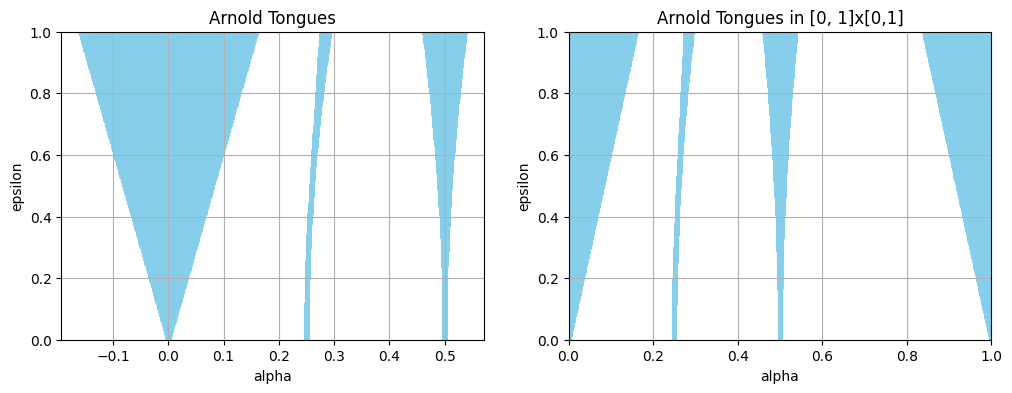

In [ ]:
# Plot the tongues!!

alpha_0_mod = np.mod(alpha_0, 1) # for visualization in [0,1]x[0,1]

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# Plot the tongues
axs[0].scatter(alpha_0, eps_0, color='skyblue', marker='o',s=7)
axs[0].scatter(alpha_1, eps_1, color='skyblue', marker='o',s=7)
axs[0].scatter(alpha_2, eps_2, color='skyblue', marker='o',s=7)
axs[0].set_xlabel('alpha')
axs[0].set_ylabel('epsilon')
axs[0].set_title('Arnold Tongues')
axs[0].set_ylim(0,1)
axs[0].grid(True)

# Plot the tongues in [0,1]x[0,1]
axs[1].scatter(alpha_0_mod, eps_0, color='skyblue', marker='o',s=7)
axs[1].scatter(alpha_1, eps_1, color='skyblue', marker='o',s=7)
axs[1].scatter(alpha_2, eps_2, color='skyblue', marker='o',s=7)
axs[1].set_xlabel('alpha')
axs[1].set_ylabel('epsilon')
axs[1].set_title('Arnold Tongues in [0, 1]x[0,1]')
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[1].grid(True)
plt.show()


In the preceding graph, we've depicted the Arnold Tongues corresponding to three different rational values of $\lambda$: 0, 1/2, and 1/4. Let us provide an explanation of our approach.

The python function *find_rational_tongues*, accepts several parameters as input: $\lambda$, a lift $F$, an integer $n$ (iterations that the lift will perform to compute the rotation number) and a tolerance (value to check if the rotation number is close to $\lambda$). The implementation proceeds through the following steps:

1.   Define a grid of values for $\alpha$ near $\lambda$, and a grid of values for $\epsilon$ from 0 to 1.
2.   Calculate successive iterations of the lift using the parameters within the grid. Begin with an initial value of $x = 0.5$, although any point within the interval [0,1] could have been selected (the rotation number is independent of the choice of $x$).
3. Divide the computation by the iterates ($n$) and subtract its entire part to obtain the rotation number.
4. Retrieve the values that are "close" to $\lambda$ where "close" is determined by the tolerance parameter.
5. Finally, plot the points!



A more challenging problem is to plot Arnold Tongues for irrational numbers. The resulting Tongues are actually curves, so a more sophisticated approach is needed. Let us work a bit!

The goal is to find the tongue for $\lambda = \frac{\sqrt{5}-1}{2}$

In [ ]:
# Define the G function, (rotation number - lambda)
def G(F, n, alpha, eps, lammbda, x_0):
    return rotation_number(F, n, alpha, eps, x_0) - lammbda

In [ ]:
# Compute the root of a function using the bisection method
def bisection(G,alpha_prev,alpha,eps,n,lammbda,x_0):
  while (alpha - alpha_prev) / 2.0 > 1e-16:
        mid = (alpha_prev + alpha) / 2.0
        g_m = G(F, n, mid, eps, lammbda, x_0)
        if abs(g_m)< 1e-8:
          return mid  # We found the root
        elif G(F, n, alpha_prev, eps, lammbda, x_0) * g_m < 0:
            alpha = mid
        else:
            alpha_prev = mid
  return None


In [ ]:
# Find tongues for particular irrational values of lambda

def find_irrational_tongues(lammbda, F, n, tol):

    # Find values of (alpha,eps) that makes rotation number equals lambda
    final_alphas = []
    final_eps = []

    # Take a grid of values of alpha near lammbda and epsilon in (0,1)
    alpha_values = np.linspace(lammbda-0.1, lammbda+0.1, 100)
    eps_values = np.linspace(0, 1, 100)

    # Fix and epsilon and consider the function G as a parameter of alpha
    for eps in tqdm(eps_values, desc=f'Computing tongue for lambda={lammbda}'):
      for i, alpha in enumerate(alpha_values):
        x_0 = 0.5 # Any number in [0,1]
        if i!=0:
          # Check if there is a change of sign, in that case G has a zero
          if (G(F,n,alpha_values[i-1],eps,lammbda,x_0) * G(F,n,alpha,eps,lammbda,x_0)) < 0:
            # Bisection method
            value_bisect = bisection(G,alpha_values[i-1],alpha,eps,n,lammbda,x_0)
            if value_bisect is not None:
              final_alphas.append(value_bisect)
              final_eps.append(eps)

    return final_alphas,final_eps

In [ ]:
# We are ready to find the tongues
# Select parameters
n = 10000 # Number of iterations the lift will do to find the rotation number
tol = 1e-3 # Tolerance to find the tongue
gm= (np.sqrt(5)-1)/2
alpha_golden,eps_golden = find_irrational_tongues(gm,F,n,tol)

Computing tongue for lambda=0.6180339887498949: 100%|██████████| 100/100 [06:40<00:00,  4.01s/it]


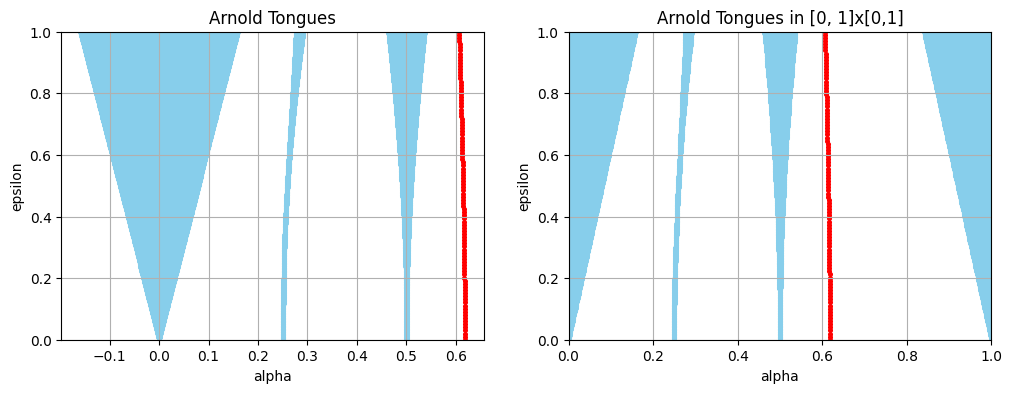

In [ ]:
# Plot the tongues all together!!

alpha_0_mod = np.mod(alpha_0, 1) # for visualization in [0,1]x[0,1]

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# Plot the tongues
axs[0].scatter(alpha_0, eps_0, color='skyblue', marker='o',s=7)
axs[0].scatter(alpha_1, eps_1, color='skyblue', marker='o',s=7)
axs[0].scatter(alpha_2, eps_2, color='skyblue', marker='o',s=7)
axs[0].scatter(alpha_golden, eps_golden, color='red', marker='o',s=7)
axs[0].set_xlabel('alpha')
axs[0].set_ylabel('epsilon')
axs[0].set_title('Arnold Tongues')
axs[0].set_ylim(0,1)
axs[0].grid(True)

# Plot the tongues in [0,1]x[0,1]
axs[1].scatter(alpha_0_mod, eps_0, color='skyblue', marker='o',s=7)
axs[1].scatter(alpha_1, eps_1, color='skyblue', marker='o',s=7)
axs[1].scatter(alpha_2, eps_2, color='skyblue', marker='o',s=7)
axs[1].scatter(alpha_golden, eps_golden, color='red', marker='o',s=7)
axs[1].set_xlabel('alpha')
axs[1].set_ylabel('epsilon')
axs[1].set_title('Arnold Tongues in [0, 1]x[0,1]')
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[1].grid(True)
plt.show()


In the preceding graph, we've depicted the Arnold Tongues corresponding to three different rational values (blue color) and one irrational value (red color). Let's provide an explanation of our approach (irrational case).

The python function *find_irrational_tongues*, accepts several parameters as input: $\lambda$, a lift $F$, an integer $n$ (iterations that the lift will perform to compute the rotation number) and a tolerance (value to check if the rotation number is close to $\lambda$). To facilitate the reading of the main function, several auxilar functions are created. A function named *G* that computes the map $\alpha\mapsto\rho(f_{\alpha,\epsilon})-\lambda$ and a function named *bisection* that computes the bisection method of the function $G$.

Our goal is to find zeros of $G$ in order to find pairs $(\alpha,\epsilon)$ whose rotation numbers are exactly $\lambda = \frac{\sqrt{5}-1}{2}$. This is equivalent to finding the desired $\lambda$-Arnold Tongue.

The implementation proceeds through the following steps:

1.   Define a grid of values for $\alpha$ near $\lambda$, and a grid of values for $\epsilon$ from 0 to 1.

2. Make a loop in $\epsilon$. For a fixed $\epsilon$, compute the value of the function $G$ for the $\alpha$-grid (this implies computing the rotation number).

3. Check if the function $G$ changes its sign at the given value of $\alpha$ with respect the previous one. If it does, it means there is a root within the interval defined by the previous $\alpha$ value and the current one. In this scenario, employ the bisection method to determine the root's value.

4. Save the values of $(\alpha, \epsilon)$ and proceed with the loop.